In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [20, 6]
import itertools
import sys
import holidays
sys.path.append('/content/drive/MyDrive/CDIS Project/forecasting')

In [ ]:
import statsmodels.api as sm
from statsmodels.iolib.smpickle import load_pickle

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/CDIS Project/forecasting/DEMAND_FILE.xlsx', sheet_name='Daily CNG Volume - Ahmedabad')

## Old stuff that we did at the beginning of Phase 1

In [ ]:
df.head()

1,Weekend,Jamalpur Station,Jamalpur Amts,Pragatinagar Station,Maninagar Station,Memco Station,Paldi Station,Paldi Amts,Sarkhej Station,Gota Station,...,Siddhi Gasoline - BPCL,Vinayak Petroleum - IOCL,Radhey Petroleum - BPCL,Shree Gokulesh Petroleum - IOCL,B N Gasoline - BPCL,Millennium-HPCL,SHREEJI AUTO SERVICE-HPCL,RAVI PETROLEUM-BPCL,GUJARAT AUTO (USHMANPURA)- IOCL STATION,Holidays
Date,,,,,,,,,,,,,,,,,,,,,
2023-04-01,1,10485.08,5954.47,6389.5,11492.98,11517.52,11557.27,1198.99,12189.48,16840.47,...,5434.84,2279.5,3503.84,3720.81,5929.37,2596.84,3028.97,5816.08,1780.32,0
2023-04-02,1,7949.78,4046.22,5083.51,9231.52,9352.54,9026.1,885.83,8977.69,13244.86,...,4535.48,1587.03,1978.2,3067.51,4578.82,2467.13,2226.45,4956.7,1092.51,1
2023-04-03,0,10399.14,6736.62,6349.81,11539.11,12081.9,11815.25,1577.99,11881.09,15618.76,...,4990.82,1915.31,2258.49,3023.93,4946.22,2101.97,2655.22,5854.4,1582.6,0
2023-04-04,0,10766.83,5844.85,6270.87,11454.52,11740.23,11815.94,1279.73,11114.76,16438.86,...,5525.29,2128.84,3228.88,3641.32,5660.6,2581.75,2710.97,5613.24,1540.98,0
2023-04-05,0,10616.97,6577.18,6686.69,13364.06,12694.16,12510.74,1369.5,14110.06,17764.37,...,5931.88,2142.56,3607.01,4023.43,5880.08,1283.6,2935.93,4120.45,1814.59,0


In [ ]:
df = df.T.drop([2,3],axis=1)
df = df.reset_index()
df = df.iloc[1:,1:]
df.iloc[0,0] = 'Date'
df.columns = df.iloc[0]
df = df.drop([1,2])
df.Date = pd.to_datetime(df.Date)
df = df.set_index('Date')
df.rename({df.columns[0]:'Weekend'}, axis=1, inplace=True)
df.rename({'Kalptaru Petroleum-BPCL/ Mody service center Adhoc':'Kalptaru Petroleum-BPCL'}, axis=1, inplace=True)
df = df.iloc[:, :-2]
df.Weekend = (df.index.day_of_week > 4).astype(int)
dates_list = list(holidays.IN(years=[2023,2024]))
df['Holidays'] = df.index.isin(dates_list).astype(int)


<ipython-input-5-28176734e4e3>:14: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df['Holidays'] = df.index.isin(dates_list).astype(int)


In [ ]:
df

1,Weekend,Jamalpur Station,Jamalpur Amts,Pragatinagar Station,Maninagar Station,Memco Station,Paldi Station,Paldi Amts,Sarkhej Station,Gota Station,...,Siddhi Gasoline - BPCL,Vinayak Petroleum - IOCL,Radhey Petroleum - BPCL,Shree Gokulesh Petroleum - IOCL,B N Gasoline - BPCL,Millennium-HPCL,SHREEJI AUTO SERVICE-HPCL,RAVI PETROLEUM-BPCL,GUJARAT AUTO (USHMANPURA)- IOCL STATION,Holidays
Date,,,,,,,,,,,,,,,,,,,,,
2023-04-01,1,10485.08,5954.47,6389.5,11492.98,11517.52,11557.27,1198.99,12189.48,16840.47,...,5434.84,2279.5,3503.84,3720.81,5929.37,2596.84,3028.97,5816.08,1780.32,0
2023-04-02,1,7949.78,4046.22,5083.51,9231.52,9352.54,9026.1,885.83,8977.69,13244.86,...,4535.48,1587.03,1978.2,3067.51,4578.82,2467.13,2226.45,4956.7,1092.51,1
2023-04-03,0,10399.14,6736.62,6349.81,11539.11,12081.9,11815.25,1577.99,11881.09,15618.76,...,4990.82,1915.31,2258.49,3023.93,4946.22,2101.97,2655.22,5854.4,1582.6,0
2023-04-04,0,10766.83,5844.85,6270.87,11454.52,11740.23,11815.94,1279.73,11114.76,16438.86,...,5525.29,2128.84,3228.88,3641.32,5660.6,2581.75,2710.97,5613.24,1540.98,0
2023-04-05,0,10616.97,6577.18,6686.69,13364.06,12694.16,12510.74,1369.5,14110.06,17764.37,...,5931.88,2142.56,3607.01,4023.43,5880.08,1283.6,2935.93,4120.45,1814.59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,0,9753.09,7897.37,6674.81,14314.59,11716.02,14292.79,1782.5,11173.44,15523.6,...,5308.94,2636.25,4955.65,3844.79,6555.8,2836.25,3116.68,6131.88,1940.04,0
2023-12-28,0,9311.79,8167.22,6724.91,13966.64,11945.58,14667.29,1917.59,10823.1,16055.54,...,5173.48,2209.49,4990.76,3499.73,6032.43,2977.81,3377.52,6388.5,1964.28,0
2023-12-29,0,11823.97,7861.88,6824.56,14401.3,12323.39,14624.47,1833.94,11581.16,16459.55,...,5351.96,2381.25,4714.38,3390.89,7211.59,2537.57,3128.33,6488.69,1938.53,0


In [ ]:
keys = list(holidays.IN(years=[2023,2024]).keys())
values = list(holidays.IN(years=[2023,2024]).values())

print(*zip(keys, values), sep='\n')

(datetime.date(2024, 1, 14), 'Makar Sankranti / Pongal')
(datetime.date(2024, 1, 26), 'Republic Day')
(datetime.date(2024, 8, 15), 'Independence Day')
(datetime.date(2024, 10, 2), 'Gandhi Jayanti')
(datetime.date(2024, 5, 1), 'Labour Day')
(datetime.date(2024, 11, 1), 'Diwali')
(datetime.date(2024, 3, 25), 'Holi')
(datetime.date(2024, 7, 16), 'Day of Ashura (estimated)')
(datetime.date(2024, 9, 15), 'Mawlid (estimated)')
(datetime.date(2024, 4, 10), 'Eid ul-Fitr (estimated)')
(datetime.date(2024, 4, 11), 'Eid ul-Fitr (estimated)')
(datetime.date(2024, 6, 16), 'Eid al-Adha (estimated)')
(datetime.date(2024, 6, 17), 'Eid al-Adha (estimated)')
(datetime.date(2024, 3, 24), 'Palm Sunday')
(datetime.date(2024, 3, 29), 'Good Friday')
(datetime.date(2024, 3, 31), 'Easter Sunday')
(datetime.date(2024, 5, 19), 'Feast of Pentecost')
(datetime.date(2024, 12, 25), 'Christmas Day')
(datetime.date(2023, 1, 14), 'Makar Sankranti / Pongal')
(datetime.date(2023, 1, 26), 'Republic Day')
(datetime.date(20

In [ ]:
df.Weekday = (df.index.day_of_week > 4).astype(int)

<ipython-input-8-a58dd32d2c05>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Weekday = (df.index.day_of_week > 4).astype(int)


In [ ]:
dates_list = list(holidays.IN(years=2023))

In [ ]:
X = df[['Weekend', 'Holidays']]

In [ ]:
X

1,Weekend,Holidays
Date,,
2023-04-01,1,0
2023-04-02,1,1
2023-04-03,0,0
2023-04-04,0,0
2023-04-05,0,0
...,...,...
2023-12-27,0,0
2023-12-28,0,0
2023-12-29,0,0


<Axes: xlabel='Date'>

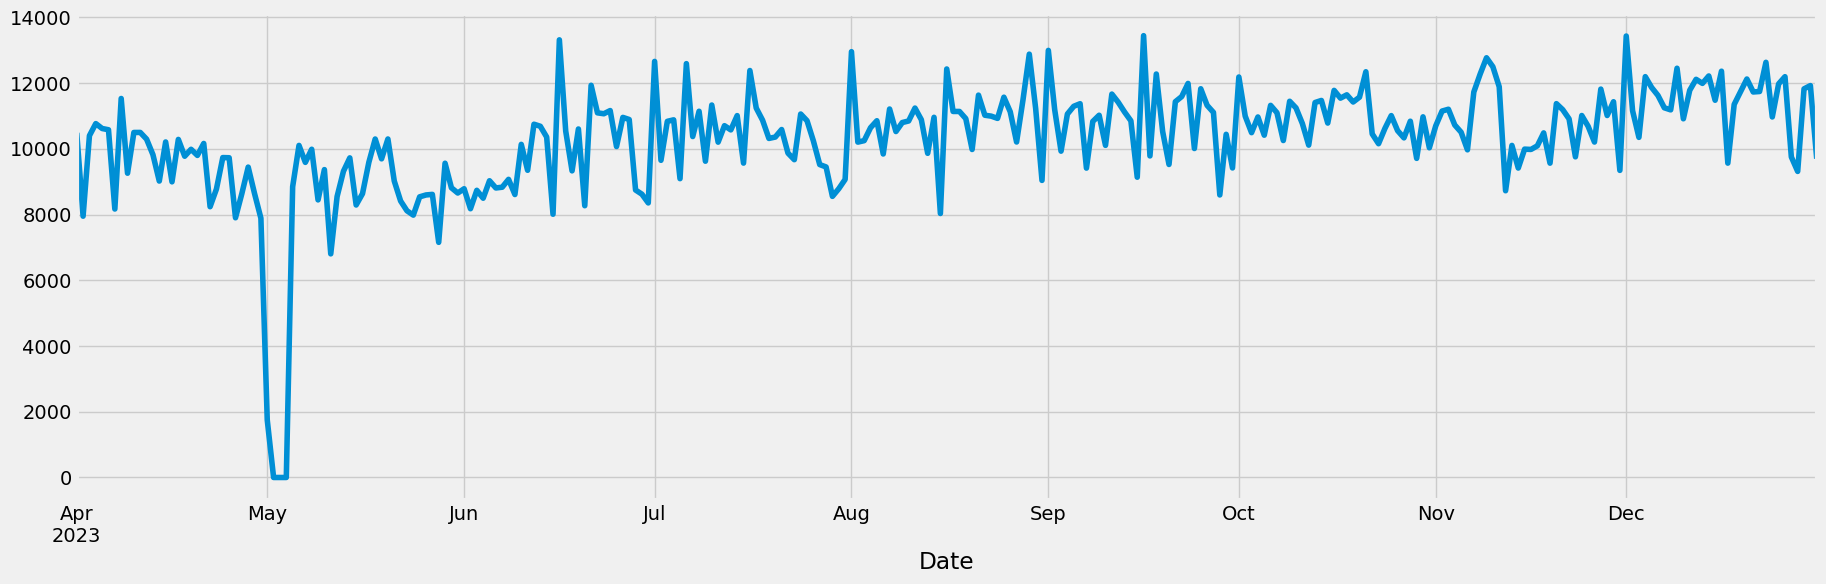

In [ ]:
df['Jamalpur Station'].plot(kind='line')

In [ ]:
df.groupby(pd.PeriodIndex(df.index, freq='M')).mean().reset_index()[station].plot(kind='line')

NameError: name 'station' is not defined

In [ ]:
df = df.iloc[:,:85]

In [ ]:
stations = df.columns[1:85]

In [ ]:
station = stations[0]

In [ ]:
def exog_for_forecasts(y,steps):
    exog_array = np.array([])
    start = y.index.weekday[len(y)-1]
    for step in range(1,steps+1):
        exog_array = np.append(exog_array,(start+step)%7)
    return exog_array


In [ ]:
def exog_for_forecasts(y,steps):
    exog_array = np.array([])
    start = y.index.weekday[len(y)-1]
    for step in range(1,steps+1):
        exog_array = np.append(exog_array,(start+step)%7)
    return exog_array


In [ ]:
for station in stations:
    try:
        decomposition = sm.tsa.seasonal_decompose(df[station], model='additive')
        fig = decomposition.plot()
        plt.savefig(station+'.jpg')
        plt.close()
    except:
        print(station)

In [ ]:
fig = decomposition.plot()
plt.show()

NameError: name 'decomposition' is not defined

In [ ]:
P = [2,3,4,6]
D = [0,1,2]
Q = [2,3,4,6]

In [ ]:
station_details = []
best_result = 10000
best_params = [0,0,0]
for station in stations:
    best_result = 10000
    print(station)
    y = df[station].astype(float)
    for p in P:
        for d in D:
            for q in Q:
                print(p,d,q)
                mod = sm.tsa.statespace.SARIMAX(y,
                                    order=(p, d, q),
                                    # seasonal_order=(1, 1, 0, 5),
                                    exog= y.index.weekday,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False
                                    )
                try:
                    results = mod.fit(full_output=False, low_memory=True)
                    if results.mae < best_result:
                        best_result = results.mae
                        best_params = [p,d,q]
                        print("Best params so far: " + str(p) + str(d) + str(q))
                except:
                    continue
    station_details = np.append(station_details, {'station':station, 'p': best_params[0], 'd':best_params[1], 'q':best_params[2]})
station_df = pd.json_normalize(station_details)
#station_df.to_csv('station_model_params.csv')
# print("Model selection: " + str(results.mae))

In [ ]:
station_df = pd.read_csv('station_model_params.csv')

In [ ]:
for station in stations:
    x = station_df[station_df.station == station]
    y = df[station].astype(float)
    mod = sm.tsa.statespace.SARIMAX(y,
                                    order=(x.p.values[0], x.d.values[0], x.q.values[0]),
                                    # seasonal_order=(1, 1, 0, 5),
                                    exog= y.index.weekday,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False
                                    )
    try:
        results = mod.fit()
        results.save('./models/'+station+'.pickle')
        pred = results.get_prediction(start=pd.to_datetime('2024-01-01'), end=pd.to_datetime('2024-01-31'),exog=exog_for_forecasts(y,31),dynamic=False)
        df[station] =  pd.concat([df[station],  pred.predicted_mean], axis=0)
        print(len(df(station)))
    except:
        print(station)

In [ ]:
df_forecast = pd.DataFrame(columns=df.columns)

In [ ]:
df_forecast['Weekday'] = exog_for_forecasts(y,31).astype(int)

In [ ]:
for station in stations:
    try:
        results = load_pickle('./models/'+station+'.pickle')
        y = df[station].astype(float)
        pred = results.get_prediction(start=pd.to_datetime('2024-01-01'), end=pd.to_datetime('2024-01-31'),exog=exog_for_forecasts(y,31),dynamic=False)
#        df[station] =  pd.concat([df[station],  pred.predicted_mean], axis=0)
        df_forecast[station] = pred.predicted_mean
    except:
        print(station)


In [ ]:
df_big = pd.concat([df,df_forecast],axis=0)

In [ ]:
df_big.shape

(306, 85)

In [ ]:
df.columns

In [ ]:
station = 'JAY DWARKADISH ENTERPRISE'

In [ ]:
df_big.to_csv('data_with_forecasts.csv')

In [ ]:
results.plot_diagnostics(figsize=(10, 5))
plt.show()

In [ ]:
for station in stations:
    y = df[station].astype(float)
    results = load_pickle('./models/'+station+'.pickle')
    pred = results.get_prediction(start=pd.to_datetime('2023-10-01'), end=pd.to_datetime('2024-01-31'),exog=exog_for_forecasts(y,31),dynamic=False)
    #pred_ci = pred.conf_int()
    ax = y['2023-09':].plot(label='Observed')
    pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(10, 5))
    #ax.fill_between(pred_ci.index,
    #                pred_ci.iloc[:, 0],
    #                pred_ci.iloc[:, 1], color='k', alpha=.2)
    ax.set_xlabel('Date')
    ax.set_ylabel('CNG Demand')
    plt.legend()
    plt.title(station)
    plt.savefig('./plots/'+station+'.jpg')
    plt.close()

In [ ]:
y = df[station].astype(float)
results = load_pickle('./models/'+station+'.pickle')
pred = results.get_prediction(start=pd.to_datetime('2023-10-01'), end=pd.to_datetime('2024-01-31'),exog=exog_for_forecasts(y,31),dynamic=False)

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2023-10-01'), end=pd.to_datetime('2024-01-31'),exog=exog_for_forecasts(y,31), dynamic=False)

In [ ]:
results_df = pd.read_csv('data_with_forecasts.csv')

In [ ]:
results_df.head()

,Date,Weekday,Jamalpur Station,Jamalpur Amts,Pragatinagar Station,Maninagar Station,Memco Station,Paldi Station,Paldi Amts,Sarkhej Station,...,Siddhanath Petroleum - HPCL,Siddhi Gasoline - BPCL,Vinayak Petroleum - IOCL,Radhey Petroleum - BPCL,Shree Gokulesh Petroleum - IOCL,B N Gasoline - BPCL,Millennium-HPCL,SHREEJI AUTO SERVICE-HPCL,RAVI PETROLEUM-BPCL,GUJARAT AUTO (USHMANPURA)- IOCL STATION
0,2023-04-01,Saturday,10485.08,5954.47,6389.50,11492.98,11517.52,11557.27,1198.99,12189.48,...,5289.32,5434.84,2279.50,3503.84,3720.81,5929.37,2596.84,3028.97,5816.08,1780.32
1,2023-04-02,Sunday,7949.78,4046.22,5083.51,9231.52,9352.54,9026.10,885.83,8977.69,...,4795.94,4535.48,1587.03,1978.20,3067.51,4578.82,2467.13,2226.45,4956.70,1092.51
2,2023-04-03,Monday,10399.14,6736.62,6349.81,11539.11,12081.90,11815.25,1577.99,11881.09,...,4864.68,4990.82,1915.31,2258.49,3023.93,4946.22,2101.97,2655.22,5854.40,1582.60
3,2023-04-04,Tuesday,10766.83,5844.85,6270.87,11454.52,11740.23,11815.94,1279.73,11114.76,...,3429.38,5525.29,2128.84,3228.88,3641.32,5660.60,2581.75,2710.97,5613.24,1540.98
4,2023-04-05,Wednesday,10616.97,6577.18,6686.69,13364.06,12694.16,12510.74,1369.50,14110.06,...,5686.38,5931.88,2142.56,3607.01,4023.43,5880.08,1283.60,2935.93,4120.45,1814.59


In [ ]:
results_df.rename({results_df.columns[0]:'Date'}, axis=1, inplace=True)

/tmp/ipykernel_7337/3645475681.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results_df.groupby(pd.PeriodIndex(results_df.Date, freq='M')).mean().reset_index()[station].plot(kind='line')


<AxesSubplot: >

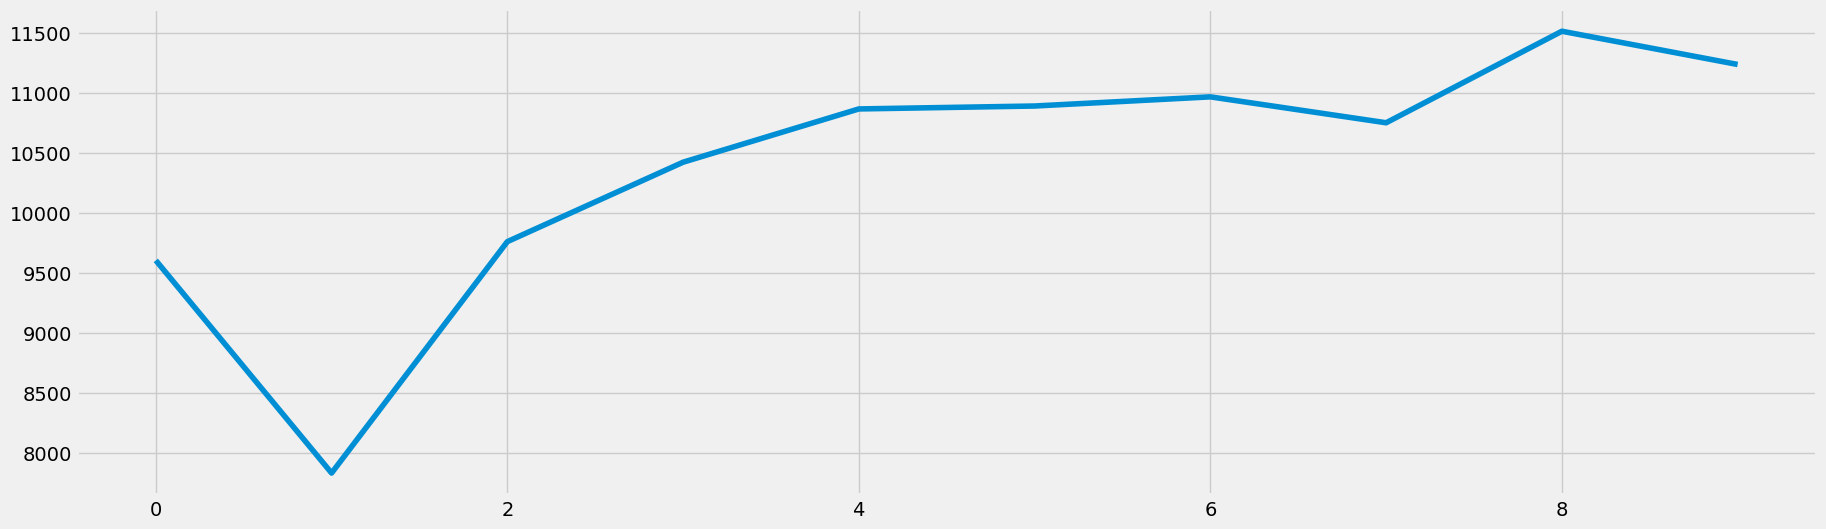

In [ ]:
results_df.groupby(pd.PeriodIndex(results_df.Date, freq='M')).mean().reset_index()[station].plot(kind='line')

# New stuff that works better

In [ ]:
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series

/home/nisheeth/anaconda3/envs/eygen/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:15: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 12.0.1. Please consider upgrading.
  warnings.warn(


In [1]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.theta import ThetaForecaster

ModuleNotFoundError: No module named 'sktime'

In [1]:
y = df['Aadhit Petroleum - IOCL'].astype('float64').asfreq('D')

NameError: name 'df' is not defined

In [ ]:
df['Weekday']

1,Weekday,Weekday,Weekday
2023-04-01,Saturday,496690.689924,NaN
2023-04-02,Sunday,449019.976491,NaN
2023-04-03,Monday,463311.3997,NaN
2023-04-04,Tuesday,456306.3432,NaN
2023-04-05,Wednesday,493338.999138,NaN
...,...,...,...
2023-12-27,Wednesday,571390.999704,NaN
2023-12-28,Thursday,576890.976666,NaN
2023-12-29,Friday,572104.814138,NaN
2023-12-30,Saturday,585843.459244,NaN


In [ ]:
y

1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Freq: M, Name: Number of airline passengers, Length: 144, dtype: float64

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Aadhit Petroleum - IOCL'>)

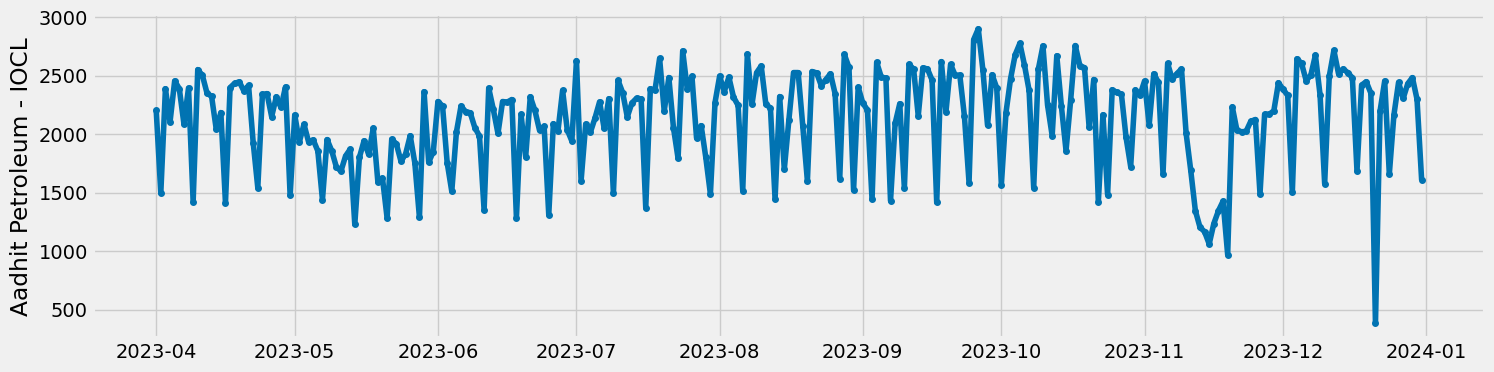

In [ ]:
# in the example, we use the airline data set.
# y = load_airline()
plot_series(y)

In [ ]:
fh = np.arange(1, 37)

# step 3: specifying the forecasting algorithm
forecaster = ThetaForecaster(sp=7)

# step 4: fitting the forecaster
forecaster.fit(y)

# step 5: querying predictions
y_pred = forecaster.predict(fh)
coverage = 0.9
y_pred_ints = forecaster.predict_interval(coverage=coverage)

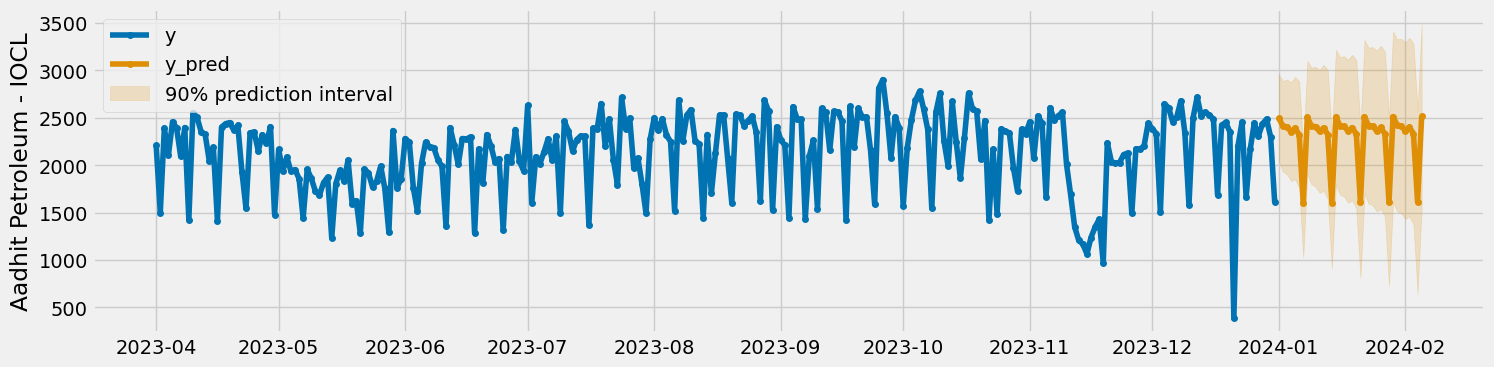

In [ ]:
from sktime.utils import plotting

# also requires predictions
y_pred = forecaster.predict()

fig, ax = plotting.plot_series(
    y, y_pred, labels=["y", "y_pred"], pred_interval=y_pred_ints
)

In [ ]:
from sktime.split import temporal_train_test_split
X_train, X_test = temporal_train_test_split(X, test_size=30)
y_train, y_test = temporal_train_test_split(y, test_size=30)

245 30 30


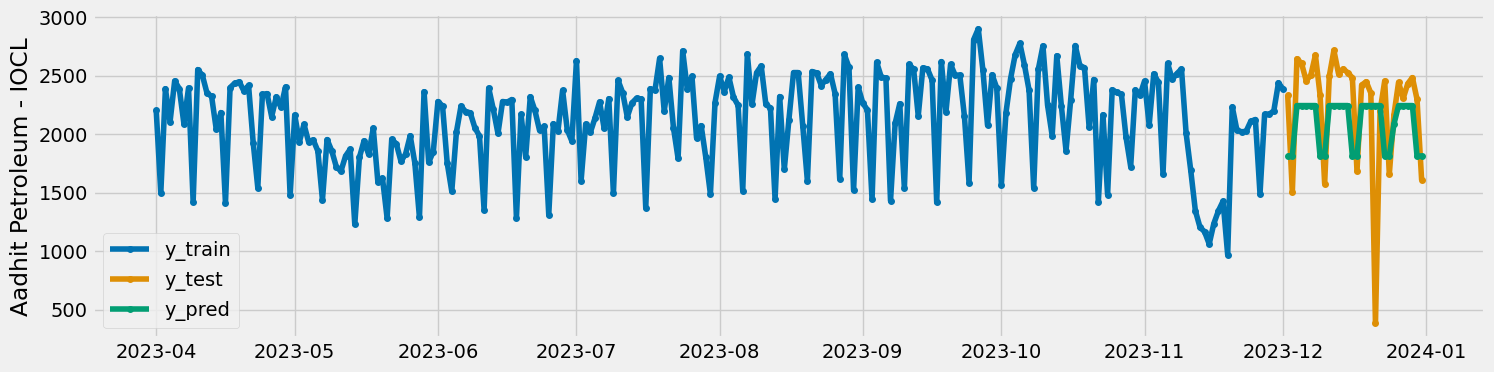

In [ ]:
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
print(y_train.shape[0], y_test.shape[0],y_pred.shape[0])

In [ ]:
from sktime.forecasting.arima import AutoARIMA

In [ ]:
fh = ForecastingHorizon(y_test.index, is_relative=False)

forecaster = AutoARIMA(sp=7, suppress_warnings=True)

forecaster.fit(y_train, X=X_train)

# y_pred will contain the predictions
y_pred = forecaster.predict(fh,X=X_test)

In [ ]:
from sktime.performance_metrics.forecasting import median_absolute_percentage_error

In [ ]:
median_absolute_percentage_error(y_test, y_pred, symmetric=False)

0.10993184447437553

In [ ]:
type(y)

pandas.core.series.Series

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Aadhit Petroleum - IOCL'>)

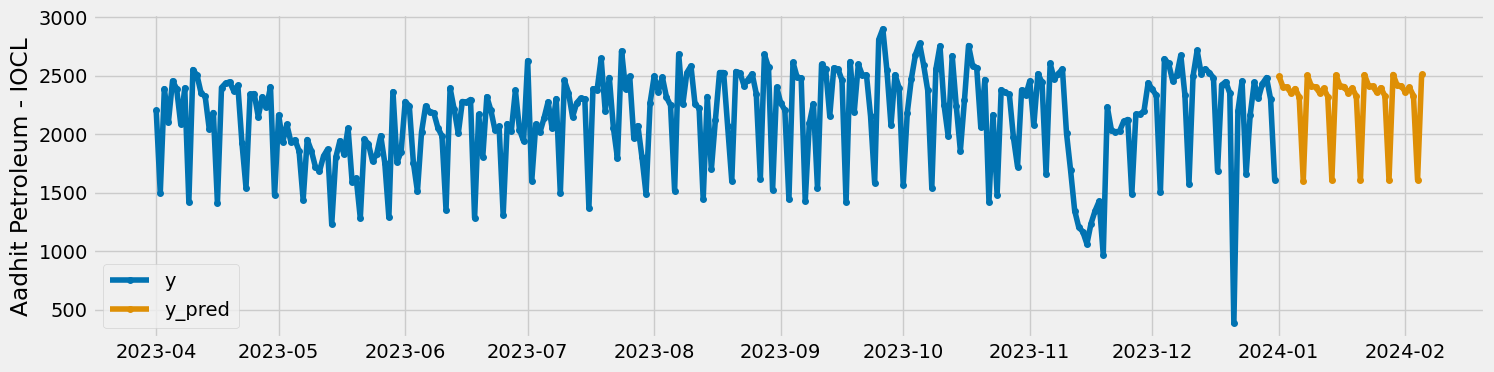

In [ ]:
plot_series(y, y_pred, labels=["y", "y_pred"])

In [ ]:
import holidays

In [ ]:
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.trend import TrendForecaster
from sktime.forecasting.model_evaluation import evaluate
from sktime.split import ExpandingWindowSplitter

In [ ]:
from sktime.datasets import load_airline
from sktime.forecasting.fbprophet import Prophet
# Prophet requires to have data with a pandas.DatetimeIndex
# y = load_airline().to_timestamp(freq='M')
forecaster = Prophet(
    seasonality_mode='multiplicative',
    n_changepoints=int(len(y) / 7),
    add_country_holidays={'country_name': 'India'},
    yearly_seasonality=False)
forecaster.fit(y)
y_pred = forecaster.predict(fh)

Importing plotly failed. Interactive plots will not work.
/home/nisheeth/anaconda3/envs/eygen/lib/python3.9/site-packages/holidays/countries/india.py:103: Warning: Diwali and Holi holidays available from 2001 to 2030 only
  warnings.warn(warning_msg, Warning)
14:19:28 - cmdstanpy - INFO - Chain [1] start processing
14:19:28 - cmdstanpy - INFO - Chain [1] done processing


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Aadhit Petroleum - IOCL'>)

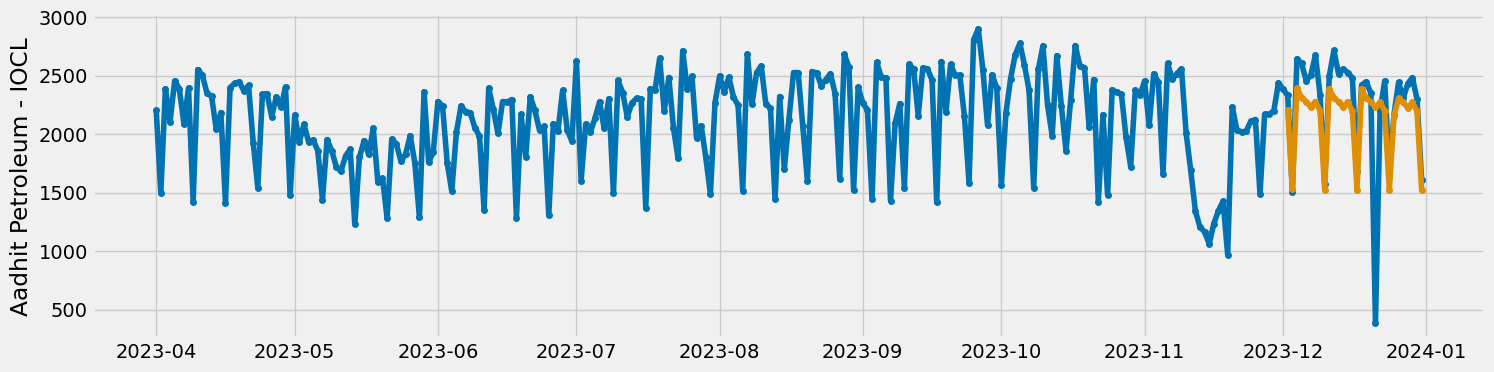

In [ ]:
plot_series(y,y_pred)

In [ ]:
forecaster

Prophet(add_country_holidays={'country_name': 'India'}, n_changepoints=39,
        seasonality_mode='multiplicative', yearly_seasonality=False)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stations = df.columns[1:85]

In [ ]:
errors = []
# forecaster = NaiveForecaster(strategy='last', sp=7)
forecaster = AutoARIMA(sp=7, suppress_warnings=True)
# forecaster = Prophet(seasonality_mode='multiplicative', n_changepoints=int(len(y) / 7), add_country_holidays={'country_name': 'India'}, yearly_seasonality=False, verbose=False)
for station in stations:
    print(station)
    y = df[station].astype('float64').asfreq('D')
    cv = ExpandingWindowSplitter(
        step_length=21, fh=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21], initial_window=21
    )

    res_df = evaluate(forecaster=forecaster, y=y, X=X,cv=cv, strategy="refit", return_data=True,error_score='MedianAbsolutePercentageError')
    res_df = res_df.drop([0,1],axis=0)
    try:
        res = res_df.test_MeanAbsolutePercentageError.median()
        row = {'station':station, 'error':res}
        errors.append(row)
    except:
        continue

errors_df = pd.DataFrame(errors)
print(errors_df.error.mean())

In [ ]:
res_df.drop([0,1],axis=0)

In [ ]:
errors_df.error.median()

0.10491790145834684

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='GUJARAT AUTO (USHMANPURA)- IOCL STATION '>)

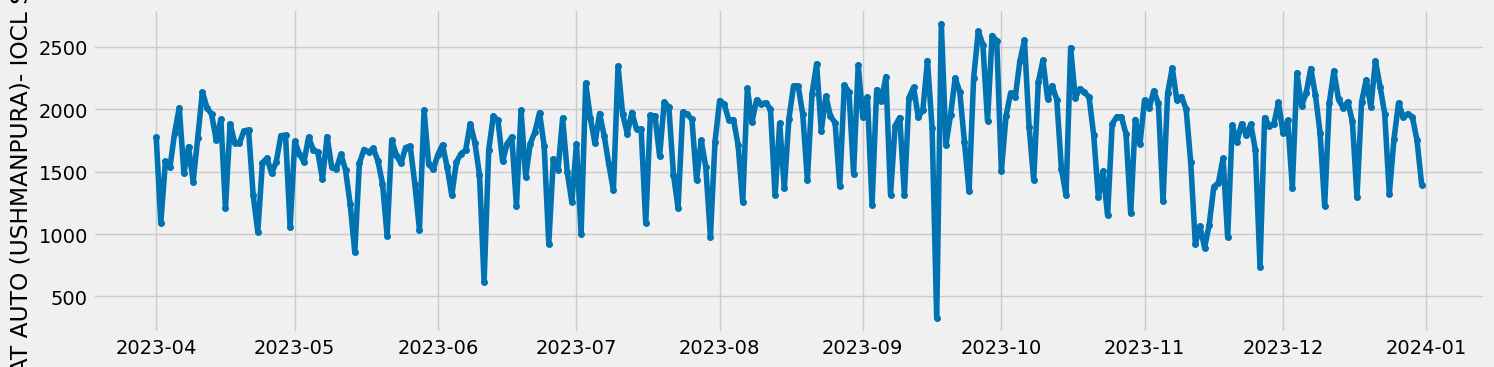

In [ ]:
plot_series(y)

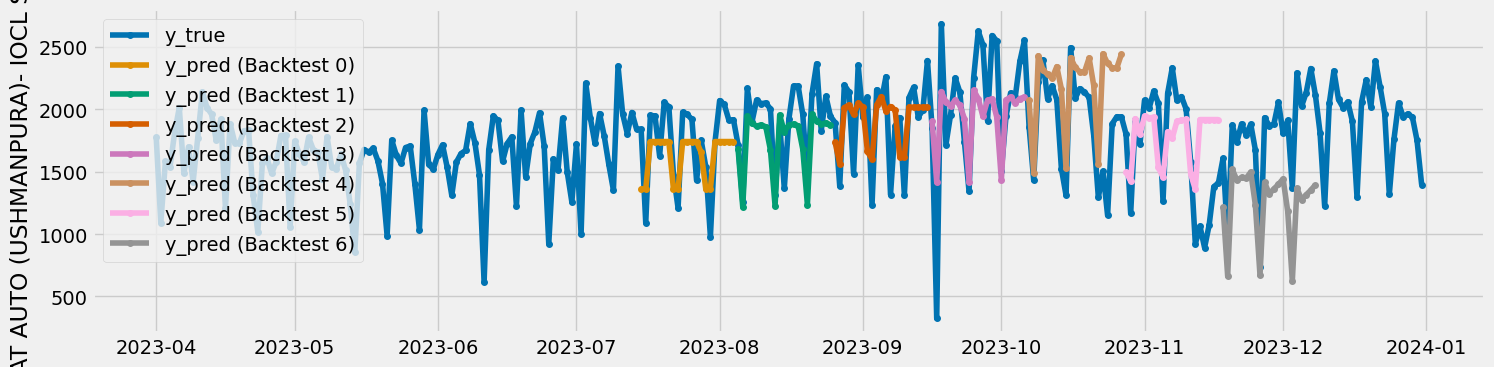

In [ ]:
# visualization of a forecaster evaluation
fig, ax = plot_series(
    y,
    res_df["y_pred"].iloc[2],
    res_df["y_pred"].iloc[3],
    res_df["y_pred"].iloc[4],
    res_df["y_pred"].iloc[5],
    res_df["y_pred"].iloc[6],
    res_df["y_pred"].iloc[7],
    res_df["y_pred"].iloc[8],
    # markers=["o", "", "", "", "", "", "", "", "", "", "", ""],
    labels=["y_true"] + ["y_pred (Backtest " + str(x) + ")" for x in range(7)],
)
ax.legend();

In [ ]:
res_df["y_pred"].iloc[2]

2023-05-03    2548.935939
2023-05-04    2405.117123
2023-05-05    2355.870617
2023-05-06    1976.597193
2023-05-07    1970.822952
2023-05-08    2331.256147
2023-05-09    2330.579107
2023-05-10    2330.347275
2023-05-11    2330.267890
2023-05-12    2330.240708
2023-05-13    1967.820987
2023-05-14    1967.817800
Freq: D, Name: Aadhit Petroleum - IOCL, dtype: float64

In [ ]:

y = df['Alka Automobile-BPCL'].astype('float64').asfreq('D')
y_train, y_test, X_train, X_test = temporal_train_test_split(y, X, test_size=30)

fh = ForecastingHorizon(y_test.index, is_relative=False)

# forecaster = NaiveForecaster(strategy="last", sp=7)

forecaster = Prophet(
    seasonality_mode='multiplicative',
    n_changepoints=int(len(y) / 7),
    add_country_holidays={'country_name': 'India'},
    yearly_seasonality=False)

# forecaster = AutoARIMA(sp=7, suppress_warnings=True)

# forecaster = TrendForecaster()

forecaster.fit(y_train,X_train)
y_pred = forecaster.predict(fh,X_test)


# step 4: computing the forecast performance
mean_absolute_percentage_error(y_test, y_pred)

# step 5: testing forecast performance against baseline
# under development

/home/nisheeth/anaconda3/envs/eygen/lib/python3.9/site-packages/holidays/countries/india.py:103: Warning: Diwali and Holi holidays available from 2001 to 2030 only
  warnings.warn(warning_msg, Warning)
/home/nisheeth/anaconda3/envs/eygen/lib/python3.9/site-packages/holidays/countries/india.py:103: Warning: Diwali and Holi holidays available from 2001 to 2030 only
  warnings.warn(warning_msg, Warning)
14:56:41 - cmdstanpy - INFO - Chain [1] start processing
14:56:41 - cmdstanpy - INFO - Chain [1] done processing


0.08786275905064293

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Alka Automobile-BPCL'>)

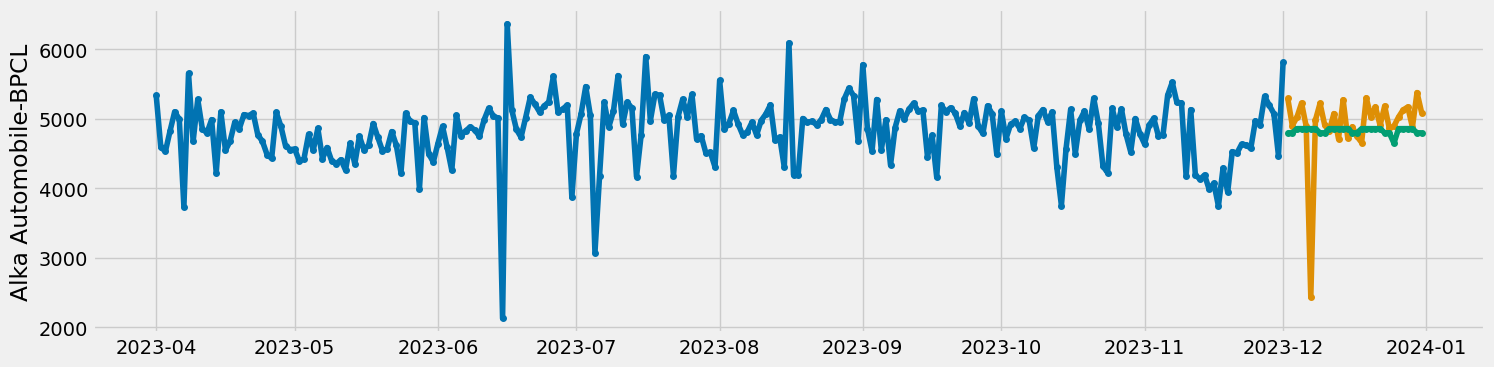

In [ ]:
plot_series(y_train,y_test,y_pred)